<a href="https://colab.research.google.com/github/WittmannF/course-v4/blob/master/book-notes/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Let's first download a utility file for setting up Google Colab
!wget https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py

from colab_utils import setup_fastai_colab
setup_fastai_colab()

--2020-08-29 21:40:17--  https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426 (1.4K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   1.39K  --.-KB/s    in 0s      

2020-08-29 21:40:18 (31.3 MB/s) - ‘colab_utils.py’ saved [1426/1426]

    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}

Installing requirements...
Done!
Cloning FastAI Repository...
Done!
Opening folder course-v4/nbs/ with nbs and utils files...
Done!
Done!


In [18]:
%cd /content/

/content


In [6]:
from fastai2.vision.all import *

In [1]:
# Instead of using Bing Images, I built an image scraper wrapper based on this post: https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d
# Some image datasets were added there, so I will be clonning it here:
!git clone https://github.com/WittmannF/image-scraper.git

Cloning into 'image-scraper'...
remote: Enumerating objects: 536, done.
remote: Counting objects: 100% (536/536), done.
remote: Compressing objects: 100% (529/529), done.
remote: Total 536 (delta 8), reused 522 (delta 3), pack-reused 0
Receiving objects: 100% (536/536), 23.58 MiB | 27.85 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [24]:
%cd image-scraper

/content/image-scraper


In [4]:
ls images

chihuahua/  dachshund/  food/  hotdog/  muffin/  pug/


In [27]:
chihuahua = glob.glob('./images/chihuahua/*.jpg')

In [32]:
import random
dest=random.choice(chihuahua)
dest

'./images/chihuahua/840dcdfeb9.jpg'

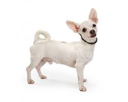

In [33]:
im=Image.open(dest)
im.to_thumb(128,128)

In [37]:
GetAttr?

In [38]:
GetAttr??

In [39]:
add_props??

In [42]:
property?

In [51]:
get_image_files?

In [45]:
ImageBlock?

In [46]:
# Get the folder name where a file is located
parent_label?

In [47]:
parent_label??

In [48]:
parent_label_new = lambda o: Path(o).parent.name

In [49]:
CategoryBlock?

In [50]:
CategoryBlock??

In [52]:
get_image_files('./images/chihuahua/')

(#96) [Path('images/chihuahua/f88c1b8e6c.jpg'),Path('images/chihuahua/f3011c0491.jpg'),Path('images/chihuahua/3d0519fa50.jpg'),Path('images/chihuahua/ce68286b5e.jpg'),Path('images/chihuahua/d0009764aa.jpg'),Path('images/chihuahua/6e717a9fd4.jpg'),Path('images/chihuahua/4ffbd49ace.jpg'),Path('images/chihuahua/68769d2f7f.jpg'),Path('images/chihuahua/e066b7826e.jpg'),Path('images/chihuahua/cb8527edab.jpg')...]

In [53]:
len(get_image_files('./images/chihuahua/'))

96

In [54]:
len(get_image_files('./images/'))

504

In [55]:
len(get_image_files('./images/', recurse=False))

0

In [67]:
dbk = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [58]:
dbk.dataloaders?

In [68]:
dls=dbk.dataloaders('./images/')

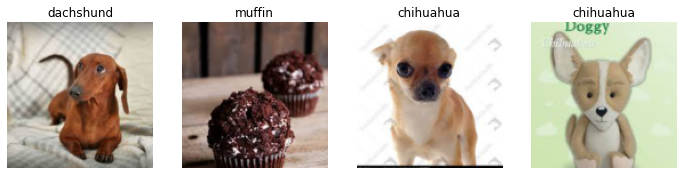

In [69]:
dls.valid.show_batch(max_n=4, nrows=1)

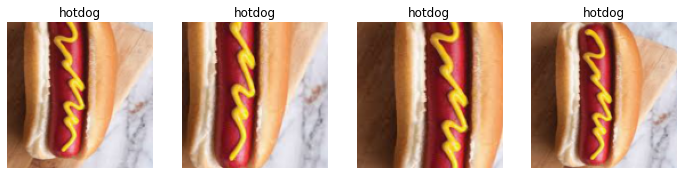

In [71]:
dbk = dbk.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls=dbk.dataloaders('./images/')
dls.train.show_batch(max_n=4, nrows=1, unique=True)